# Finance Data Project 

In this data project we focus on exploratory data analysis of stock prices. This project is meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

### The Imports


In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
df = pd.read_pickle('all_banks')

In [ ]:
import pandas_datareader.data as web
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)
f = web.DataReader('F', 'google', start, end)

In [ ]:
BAC = data.DataReader("BAC", 'google', start, end)
C = data.DataReader("C", 'google', start, end)
GS = data.DataReader("GS", 'google', start, end)
JPM = data.DataReader("JPM", 'google', start, end)
MS = data.DataReader("MS", 'google', start, end)
WFC = data.DataReader("WFC", 'google', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [ ]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [ ]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [ ]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [3]:
bank_stocks = df
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [4]:
bank_stocks.head(1)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   

Bank Ticker             ...        MS                                 WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume  Open   
Date                    ...                                                 
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.6   

Bank Ticker                               
Stock Info    High   Low Close    Volume  
Date                                      
2006-01-03   31.98  31.2  31.9  11016400  

[1 rows x 30 columns]

In [5]:
bank_stocks.T.xs('Close',level='Stock Info').T.max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [ ]:
# another way:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

In [ ]:
# or:
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [6]:
returns = pd.DataFrame()

In [7]:
returns

""


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [8]:
returns = bank_stocks.T.xs('Close',level='Stock Info').T.pct_change()

In [ ]:
# another way:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [9]:
returns.columns = ['BAC Return', 'C Return', 'GS Return', 'JPM Return', 'MS Return', 'WFC Return']

In [10]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [11]:
import seaborn as sns

sns.set_style('whitegrid')

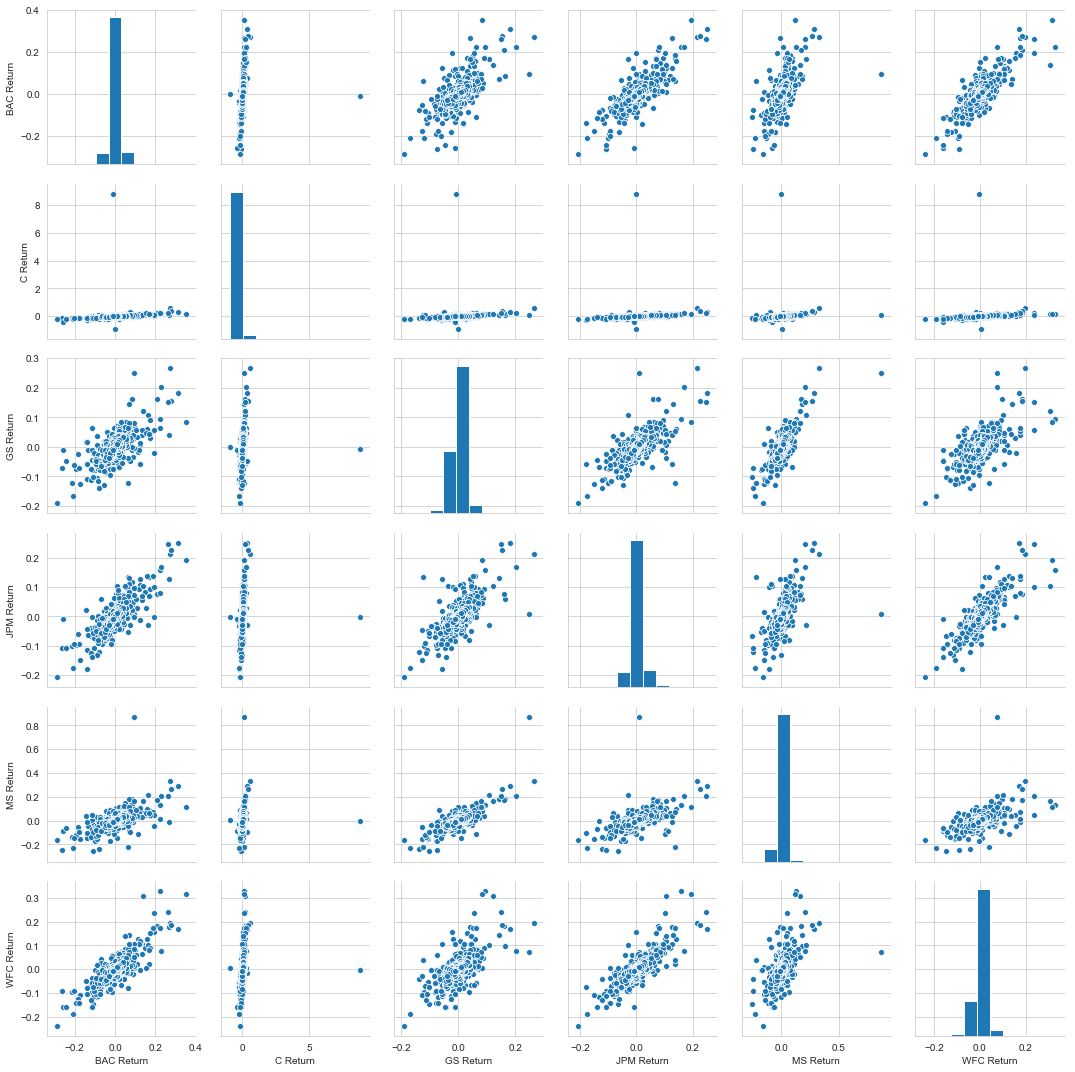

In [12]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [13]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [ ]:
# returns['BAC Return'].argmin()

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [14]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [15]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [16]:
returns.loc['2015'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [17]:
# another:
returns.ix['2015-01-01':'2015-12-31'].std()

C:\Users\Gosia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Gosia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


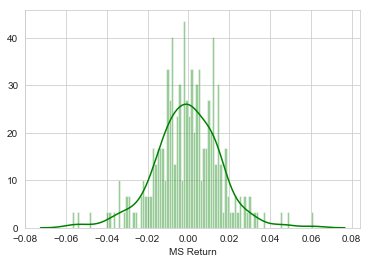

In [18]:
sns.distplot(returns.loc['2015']['MS Return'],bins=100,color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\Gosia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


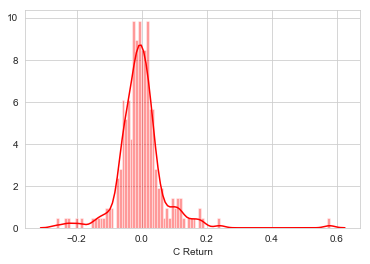

In [19]:
sns.distplot(returns.loc['2008']['C Return'],bins=100,color='red')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [ ]:
# another way with for loop:
for tick in tickers:
    bank_stacks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

In [ ]:
# another way with xs:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [ ]:
# another way with plottly:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

In [21]:
bank_stocks.T.xs('Close',level='Stock Info').T.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


In [22]:
bank_stocks.columns.levels[0]

Index(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], dtype='object', name='Bank Ticker')

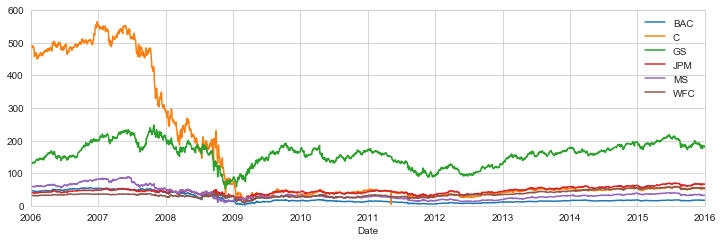

In [23]:
fig = plt.figure(figsize=(12,4))
axes = fig.add_axes([0.1, 0.1, 0.78, 0.68])
axes.plot(bank_stocks.T.xs('Close',level='Stock Info').T)
axes.set_xlabel('Date')
axes.set_xlim(['2006','2016'])
axes.set_ylim([0,600])
axes.legend(bank_stocks.columns.levels[0],frameon =False)

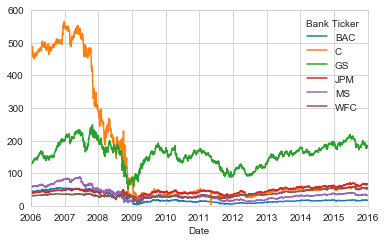

In [24]:
fig = plt.figure(figsize=(6,4))
axes = fig.add_axes([0.1, 0.1, 0.78, 0.68])
axes.plot(bank_stocks.T.xs('Close',level='Stock Info').T)
axes.set_xlabel('Date')
axes.set_xlim(['2006','2016'])
axes.set_ylim([0,600])
axes.legend(bank_stocks.columns.levels[0],frameon =False,title ='Bank Ticker')

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [ ]:
# another way:
plt.figure(figsize=(12,4))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day mov avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

In [25]:
df_BAC_2008 = bank_stocks.loc['2008'].T.xs('Close',level='Stock Info').T['BAC']
rolling_mean = df_BAC_2008.rolling(window=30).mean()

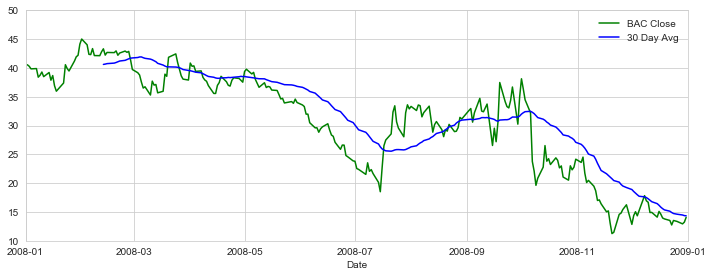

In [26]:
fig = plt.figure(figsize=(10,4))
axes = fig.add_axes([0.1, 0.1, 0.92, 0.8])
axes.plot(df_BAC_2008,color='green')
axes.plot(rolling_mean,color='blue')
axes.set_xlabel('Date')
axes.set_xlim(['2008','2009'])
axes.locator_params(axis='y',nbins=10)
#axes.locator_params(axis='x',nbins=12)
axes.set_ylim([10,50])
axes.legend(['BAC Close','30 Day Avg'],frameon=False)

** Create a heatmap of the correlation between the stocks Close Price.**

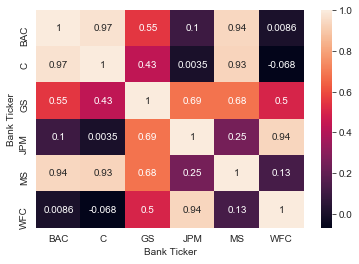

In [27]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),
            annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

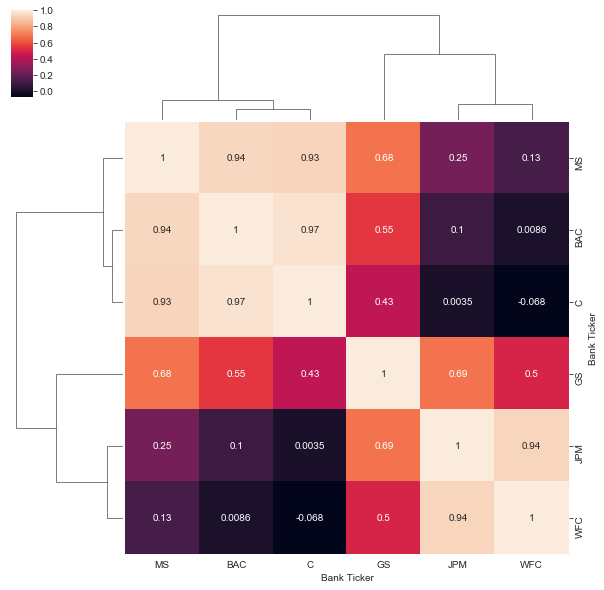

In [28]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), annot=True)

In [ ]:
# another way with plottly:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [ ]:
bac15 = BAC[['Open','High','Low','Close']].ix['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')
# candle stick plots - for financial analysis, tells you
# the open high low close, whether the stock went up or downon that day

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [ ]:
MS['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [ ]:
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.